In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

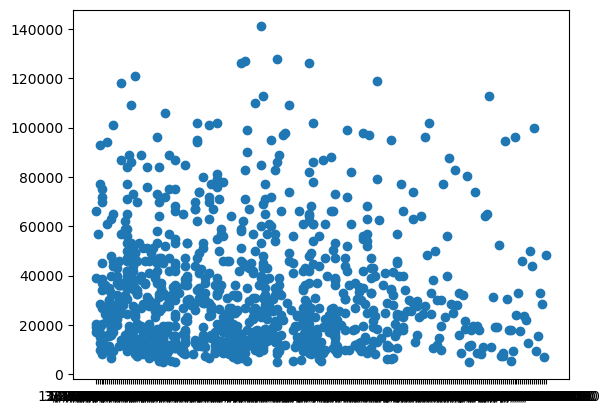

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

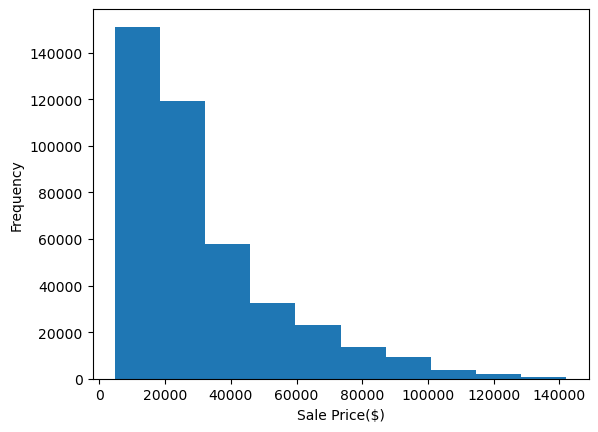

In [7]:
df.SalePrice.plot.hist(xlabel="Sale Price($)");

In [8]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False, parse_dates=["saledate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [9]:
df["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

Text(0, 0.5, 'Sale Price ($)')

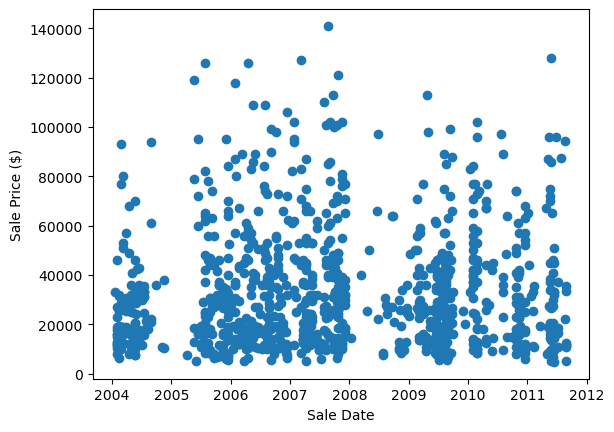

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)")

In [11]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10), df.saledate.tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

In [12]:
df_tmp = df.copy()

In [13]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear

df_tmp.drop("saledate",axis=1, inplace=True)

In [14]:
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofWeek", "saleDayofYear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


Text(0, 0.5, 'Sale Price ($)')

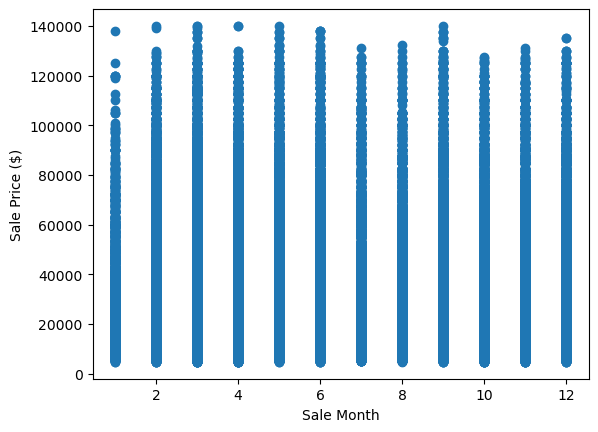

In [15]:
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:100000], y=df_tmp["SalePrice"][:100000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)")

Text(0, 0.5, 'Median Sale Price ($)')

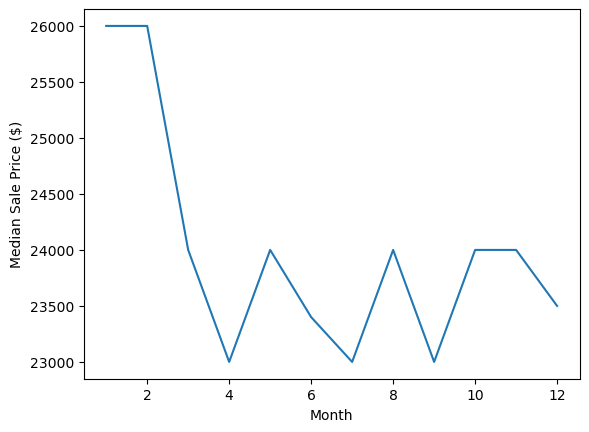

In [16]:
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)")

In [17]:
df_tmp.state.value_counts()[:10]

state
Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: count, dtype: int64

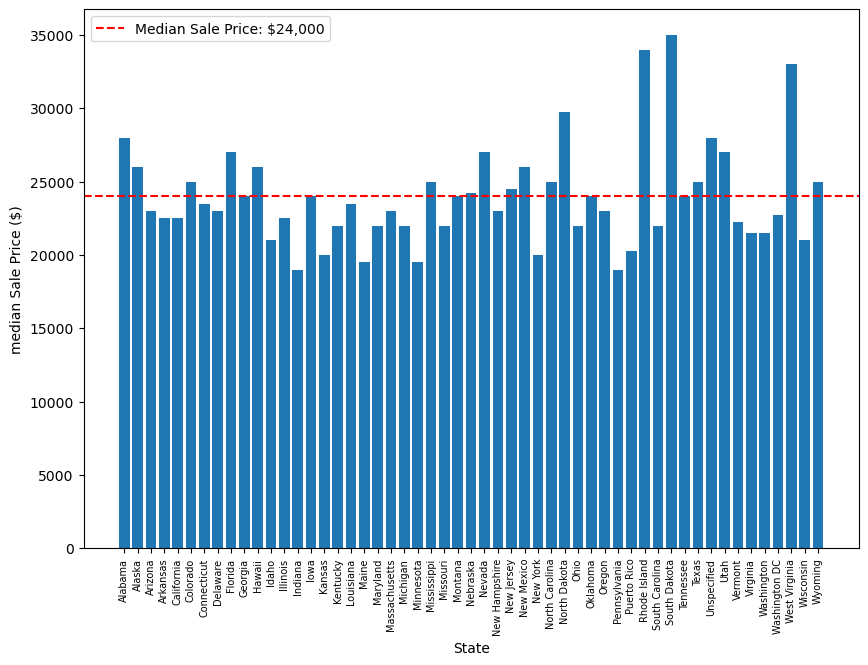

In [18]:
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median()
median_sale_price = df_tmp["SalePrice"].median()

plt.figure(figsize=(10,7))
plt.bar(x=median_prices_by_state.index, height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7)
plt.axhline(y=median_sale_price, color="red", linestyle="--", label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend()

In [19]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1)
model.fit(X=df_tmp.drop("SalePrice",axis=1), y=df_tmp.SalePrice)

ValueError: could not convert string to float: 'Low'

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [21]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [22]:
df_tmp["UsageBand"].dtype, df_tmp["UsageBand"].dtype.name

(dtype('O'), 'object')

In [23]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]=df_tmp[label].astype("category")

In [24]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [25]:
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [26]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [27]:
df_tmp.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming']

In [28]:
target_state_cat_number=4
target_state_cat_value = df_tmp.state.cat.categories[target_state_cat_number]
print(f"Target state category number {target_state_cat_number} maps to : {target_state_cat_value}")

Target state category number 4 maps to : California


In [29]:
df_tmp.to_csv("./data/TrainAndValid_object_values_as_categories.csv",index=False)

In [30]:
df_tmp = pd.read_csv("./data/TrainAndValid_object_values_as_categories.csv", low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [32]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]=df_tmp[label].astype("category")

In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [34]:
df_tmp.to_parquet(path="./data/TrainAndValid_object_values_as_categories.parquet",engine="auto")

In [55]:
df_tmp = pd.read_parquet(path="./data/TrainAndValid_object_values_as_categories.parquet",engine="auto")

In [56]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [57]:
df_tmp.isna().sum().sort_values(ascending=False)[:20]

Blade_Width          386715
Engine_Horsepower    386715
Tip_Control          386715
Pushblock            386715
Blade_Extension      386715
Enclosure_Type       386715
Scarifier            386704
Hydraulics_Flow      367823
Grouser_Tracks       367823
Coupler_System       367724
fiModelSeries        354031
Steering_Controls    341176
Differential_Type    341134
UsageBand            339028
fiModelDescriptor    337882
Backhoe_Mounting     331986
Stick                331602
Turbocharged         331602
Pad_Type             331602
Blade_Type           330823
dtype: int64

In [58]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        column_datatype = df_tmp[label].dtype.name
        example_value = content.sample(1).values
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | column dtype: {column_datatype} | Example value: {example_value} | Example Value dtype: {example_value_dtype}")

Column name: SalesID | column dtype: int64 | Example value: [1289837] | Example Value dtype: integer
Column name: SalePrice | column dtype: float64 | Example value: [31000.] | Example Value dtype: floating
Column name: MachineID | column dtype: int64 | Example value: [1505324] | Example Value dtype: integer
Column name: ModelID | column dtype: int64 | Example value: [4736] | Example Value dtype: integer
Column name: datasource | column dtype: int64 | Example value: [149] | Example Value dtype: integer
Column name: auctioneerID | column dtype: float64 | Example value: [26.] | Example Value dtype: floating
Column name: YearMade | column dtype: int64 | Example value: [1993] | Example Value dtype: integer
Column name: MachineHoursCurrentMeter | column dtype: float64 | Example value: [nan] | Example Value dtype: floating
Column name: saleYear | column dtype: int64 | Example value: [2007] | Example Value dtype: integer
Column name: saleMonth | column dtype: int64 | Example value: [2] | Examp

In [59]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: True
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: True
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofWeek | Has missing values: False
Column name: saleDayofYear | Has missing values: False


In [60]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"]=pd.isnull(content).astype(int)
            df_tmp[label] = content.fillna(content.median())

In [61]:
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
32211,1420790,65000.0,1329764,3822,132,2.0,1990,0.0,NaN,950E,...,NaN,Standard,Conventional,1994,10,1,5,274,0,1
342854,1903090,19000.0,1484948,21449,132,5.0,2002,0.0,NaN,80NX,...,NaN,NaN,NaN,2010,4,8,3,98,0,1
104711,1664361,8750.0,1503307,14756,132,2.0,1998,0.0,NaN,LX565,...,NaN,NaN,NaN,2001,1,20,5,20,0,1
334810,1534450,68500.0,1484033,3495,132,2.0,2005,0.0,NaN,322C,...,NaN,NaN,NaN,2010,2,5,4,36,0,1
141855,1490368,65000.0,534470,1636,132,1.0,1999,0.0,NaN,D6RLGP,...,Finger Tip,NaN,NaN,2003,2,20,3,51,0,1


In [62]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: False
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: False
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofWeek | Has missing values: False
Column name: saleDayofYear | Has missing values: False
Column name: auctioneerID_is_missing | Has missing values: False
Column name: MachineHoursCurrentMeter_is_missing | Has missing values: False


In [63]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

In [64]:
print(f"Columns which are not numeric:")
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"Column name: {label} | column dtype: {df_tmp[label].dtype.name}")
           

Columns which are not numeric:
Column name: UsageBand | column dtype: category
Column name: fiModelDesc | column dtype: category
Column name: fiBaseModel | column dtype: category
Column name: fiSecondaryDesc | column dtype: category
Column name: fiModelSeries | column dtype: category
Column name: fiModelDescriptor | column dtype: category
Column name: ProductSize | column dtype: category
Column name: fiProductClassDesc | column dtype: category
Column name: state | column dtype: category
Column name: ProductGroup | column dtype: category
Column name: ProductGroupDesc | column dtype: category
Column name: Drive_System | column dtype: category
Column name: Enclosure | column dtype: category
Column name: Forks | column dtype: category
Column name: Pad_Type | column dtype: category
Column name: Ride_Control | column dtype: category
Column name: Stick | column dtype: category
Column name: Transmission | column dtype: category
Column name: Turbocharged | column dtype: category
Column name: Bl

In [65]:
column_to_category_dict = {}
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 

        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))
        df_tmp[label] = content_category_codes

In [66]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
344127,2720270,12000.0,1254707,9579,149,15.0,2004,0.0,0,4265,...,1,1,1,1,1,1,1,1,1,1
266584,2419952,62500.0,1346352,16484,136,2.0,2005,0.0,0,3770,...,0,0,0,0,0,1,1,1,1,1
382631,2637525,47500.0,1833501,4713,149,1.0,2001,10173.0,3,1019,...,0,0,0,0,0,1,1,1,1,1
161361,1468520,15000.0,1529484,4200,132,16.0,1991,0.0,0,2462,...,0,0,0,0,0,1,1,1,1,1
220146,1687237,107500.0,1371680,15328,132,1.0,2002,0.0,0,5042,...,0,0,0,0,0,1,1,1,1,1


In [67]:
for key, value in sorted(column_to_category_dict["UsageBand"].items()):
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


In [69]:
for key, value in sorted(column_to_category_dict["state"].items()):
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia
11 -> Hawaii
12 -> Idaho
13 -> Illinois
14 -> Indiana
15 -> Iowa
16 -> Kansas
17 -> Kentucky
18 -> Louisiana
19 -> Maine
20 -> Maryland
21 -> Massachusetts
22 -> Michigan
23 -> Minnesota
24 -> Mississippi
25 -> Missouri
26 -> Montana
27 -> Nebraska
28 -> Nevada
29 -> New Hampshire
30 -> New Jersey
31 -> New Mexico
32 -> New York
33 -> North Carolina
34 -> North Dakota
35 -> Ohio
36 -> Oklahoma
37 -> Oregon
38 -> Pennsylvania
39 -> Puerto Rico
40 -> Rhode Island
41 -> South Carolina
42 -> South Dakota
43 -> Tennessee
44 -> Texas
45 -> Unspecified
46 -> Utah
47 -> Vermont
48 -> Virginia
49 -> Washington
50 -> Washington DC
51 -> West Virginia
52 -> Wisconsin
53 -> Wyoming


In [70]:
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"Total missing values: {total_missing_values} - Finally no missing values, Let's build a model!")
else:
    print(f"uh ohh.. total missing values: {total_missing_values} - Let's recheck our steps to fill the values")

Total missing values: 0 - Finally no missing values, Let's build a model!


In [75]:
%%time

df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

model = RandomForestRegressor(n_jobs=-1)

X_sample_1k = df_tmp_sample_1k.drop("SalePrice",axis=1)
y_sample_1k = df_tmp_sample_1k["SalePrice"]

model.fit(X=X_sample_1k, y=y_sample_1k)

CPU times: total: 1.58 s
Wall time: 305 ms


RandomForestRegressor(n_jobs=-1)

In [76]:
model_sample_1k_score = model.score(X=X_sample_1k, y=y_sample_1k)
print(f"Model score on {len(df_tmp)} samples: {model_sample_1k_score}")

Model score on 412698 samples: 0.9571697839192932


In [77]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,1,1,1,1,1,0,0,0,1,1
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,1,1,1,1,1,1,1,1,0,0
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,1,1,1,1,1,0,0,0,1,1
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,1,1,1,1,1,1,1,1,0,0
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,1,1,1,1,1,0,0,0,1,1


In [79]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [80]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear !=2012]

len(df_val), len(df_train)

(11573, 401125)

In [83]:
X_train, y_train = df_train.drop("SalePrice",axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [95]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {  "Training MAE": mean_absolute_error(y_train,train_preds),
                "Valid MAE": mean_absolute_error(y_valid,val_preds),
                "Training RMSLE":rmsle(y_train, train_preds),
                "Valid RMSLE":rmsle(y_valid, val_preds),
                "Training R^2":model.score(X_train, y_train),
                "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [93]:
%%time
model.fit(X_train, y_train)
show_scores(model)

NameError: name 'valid_preds' is not defined

In [88]:
len(X_train)

401125

In [89]:
model = RandomForestRegressor(n_jobs=-1, max_samples=10000)

In [90]:
%%time
model.fit(X_train, y_train)

CPU times: total: 34.4 s
Wall time: 4.97 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [96]:
show_scores(model)

{'Training MAE': 5555.5091357307565,
 'Valid MAE': 7124.664513954894,
 'Training RMSLE': np.float64(0.25773625471459005),
 'Valid RMSLE': np.float64(0.2917451342200158),
 'Training R^2': 0.8610667494184396,
 'Valid R^2': 0.8345801941773071}

In [100]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5,1.0,"sqrt"],
           "max_samples":[10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 5min 49s
Wall time: 6min 15s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [101]:
rs_model.best_params_

{'n_estimators': np.int64(70),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(19),
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': None}

In [102]:
show_scores(rs_model)

{'Training MAE': 6526.652728139548,
 'Valid MAE': 8110.154966669227,
 'Training RMSLE': np.float64(0.2928181498724043),
 'Valid RMSLE': np.float64(0.32219848012057456),
 'Training R^2': 0.8084784819561412,
 'Valid R^2': 0.7780274438740291}

In [103]:
%%time

ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train,y_train)

CPU times: total: 6min 9s
Wall time: 50.2 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [104]:
show_scores(ideal_model)

{'Training MAE': 2922.42488608071,
 'Valid MAE': 5912.775295453136,
 'Training RMSLE': np.float64(0.14312985298369046),
 'Valid RMSLE': np.float64(0.24379808878164158),
 'Training R^2': 0.9598585367672539,
 'Valid R^2': 0.8836796216711295}